In [300]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [301]:
df = pd.read_csv('energydata_complete.csv')

In [302]:
df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [303]:
column_names = {'T1':'Temperature in kitchen area', 'RH_1':'Humidity in kitchen area','T2':'Temperature in living room area','RH_2':'Humidity in living room area',
'T3':'Temperature in laundry room area','RH_3':'Humidity in laundry room area','T4':'Temperature in office room','RH_4':'Humidity in office room',
'T5':'Temperature in bathroom','RH_5':'Humidity in bathroom','T6':'Temperature outside the building (north side)','RH_6':'Humidity outside the building (north side)','T7':'Temperature in ironing room',
'RH_7':'Humidity in ironing room','T8':'Temperature in teenager room 2','RH_8':'Humidity in teenager room 2','T9':'Temperature in parents room',
'RH_9':'Humidity in parents room','To':'Temperature outside','rv1':'Random variable 1','rv2':'Random variable 2'
}

In [304]:
#renaming the columns to make the dataset easier to read and understand
df = df.rename(columns=column_names)

In [305]:
#suming the null values in each column
df.isnull().sum()

date                                             0
Appliances                                       0
lights                                           0
Temperature in kitchen area                      0
Humidity in kitchen area                         0
Temperature in living room area                  0
Humidity in living room area                     0
Temperature in laundry room area                 0
Humidity in laundry room area                    0
Temperature in office room                       0
Humidity in office room                          0
Temperature in bathroom                          0
Humidity in bathroom                             0
Temperature outside the building (north side)    0
Humidity outside the building (north side)       0
Temperature in ironing room                      0
Humidity in ironing room                         0
Temperature in teenager room 2                   0
Humidity in teenager room 2                      0
Temperature in parents room    

In [306]:
#dropping the uneeded variables(date and light) to avoid noise in thge model and reduce computational requirements
df1= df.drop(['date', 'lights'], axis = 1)

In [307]:
#to scale all the values to the same range
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [308]:
normalised_df = pd.DataFrame(scaler.fit_transform(df1), columns = df1.columns)

In [309]:
#temp in living room against temp outside building
df2=normalised_df[['Temperature in living room area', 'T_out']]

In [310]:
df2

,Temperature in living room area,T_out
0,0.225345,0.372990
1,0.225345,0.369239
2,0.225345,0.365488
3,0.225345,0.361736
4,0.225345,0.357985
...,...,...
19730,0.711655,0.891747
19731,0.701769,0.887460
19732,0.692651,0.883173
19733,0.677054,0.878885


<AxesSubplot:xlabel='Temperature in living room area', ylabel='T_out'>

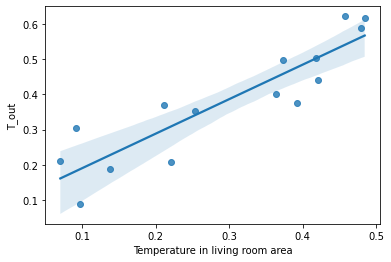

In [311]:
#regression plot
sns.regplot(x="Temperature in living room area", y="T_out",data=simple_linear_reg_df)

In [312]:
import statsmodels.api as sm

In [313]:
y1 = df2['T_out']

In [314]:
x1 = df2['Temperature in living room area']

In [315]:
x1 = sm.add_constant(x1)

In [316]:
model = sm.OLS(y1, x1).fit()

In [317]:
#QUESTION 12 (R-SQUARED TO 2.DP)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  T_out   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                 3.327e+04
Date:                Mon, 15 Aug 2022   Prob (F-statistic):               0.00
Time:                        09:08:17   Log-Likelihood:                 16603.
No. Observations:               19735   AIC:                        -3.320e+04
Df Residuals:                   19733   BIC:                        -3.319e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [318]:
#QUESTION 13(CALCULATE MEAN ABSOLUTE ERROR AFTER NOMALIZING THE DATASET)
x = normalised_df.drop(columns=['Appliances'])

In [319]:
y = normalised_df['Appliances']

In [342]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [343]:
linear_model = LinearRegression()

In [344]:
linear_model.fit(x_train, y_train)

LinearRegression()

In [345]:
predicted_values = linear_model.predict(x_test)

In [346]:
from sklearn.metrics import mean_absolute_error

In [347]:
mae = mean_absolute_error(y_test, predicted_values)

In [348]:
round(mae, 3)

0.05

In [349]:
from sklearn.metrics import mean_squared_error

In [350]:
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))

In [351]:
#QUESTION 15(root mean squared error)
round(rmse, 3)

0.088

In [352]:
from sklearn.metrics import r2_score

In [353]:
r2_score=r2_score(y_test,predicted_values)

In [360]:
#QUESTION 16(coefficient of determination)
round(r2_score,2)

0.15

In [355]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001)

In [356]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.5)

In [357]:
#question 18. ridgeset changed to 0.4. no observed difference in the weights, as such no difference in RMSE
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.4)

In [358]:
#comparing the effects of regularisation
def get_weights_df(model, feat, col_name):
#this function returns the weight of every feature
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df

In [359]:
linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')

In [338]:
final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')

In [339]:
#QUESTION 17 (TO DETERMINE VALUES WITH HIGHEST AND LOWEST WEIGHTS)
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,Humidity in living room area,-0.456698,-0.411071,-0.000000
1,T_out,-0.321860,-0.262172,0.000000
2,Temperature in living room area,-0.236178,-0.201397,0.000000
3,Temperature in parents room,-0.189941,-0.188916,-0.000000
4,Humidity in teenager room 2,-0.157595,-0.156830,-0.000110
5,RH_out,-0.077671,-0.054724,-0.049557
6,Humidity in ironing room,-0.044614,-0.045977,-0.000000
7,Humidity in parents room,-0.039800,-0.041367,-0.000000
8,Temperature in bathroom,-0.015657,-0.019853,-0.000000
9,Temperature in kitchen area,-0.003281,-0.018406,0.000000


In [340]:
#question 19. Only four values have non-zero numbers
lasso_weights_df

,Features,Lasso_weight
0,RH_out,-0.049557
1,Humidity in teenager room 2,-0.000110
2,Temperature in kitchen area,0.000000
3,Tdewpoint,0.000000
4,Visibility,0.000000
5,Press_mm_hg,-0.000000
6,T_out,0.000000
7,Humidity in parents room,-0.000000
8,Temperature in parents room,-0.000000
9,Temperature in teenager room 2,0.000000


In [361]:
x3 = normalised_df[['RH_out', 'Humidity in teenager room 2', 'Windspeed','Humidity in kitchen area']]

In [362]:
x3

,RH_out,Humidity in teenager room 2,Windspeed,Humidity in kitchen area
0,0.894737,0.661412,0.500000,0.566187
1,0.894737,0.660155,0.476190,0.541326
2,0.894737,0.655586,0.452381,0.530502
3,0.894737,0.650788,0.428571,0.524080
4,0.894737,0.650788,0.404762,0.531419
...,...,...,...,...
19730,0.416667,0.701645,0.238095,0.537657
19731,0.421053,0.691912,0.250000,0.536006
19732,0.425439,0.687457,0.261905,0.538666
19733,0.429825,0.682617,0.273810,0.549491


In [363]:
y3 = normalised_df[['Appliances']]

In [364]:
y3

,Appliances
0,0.046729
1,0.046729
2,0.037383
3,0.037383
4,0.046729
...,...
19730,0.084112
19731,0.074766
19732,0.242991
19733,0.383178


In [365]:
from sklearn.model_selection import train_test_split

In [366]:
x_train, x_test, y_train, y_test = train_test_split(x3, y3, test_size=0.3, random_state=1)

In [367]:
from sklearn.linear_model import LinearRegression

In [368]:
linear_model = LinearRegression()

In [369]:
linear_model.fit(x_train, y_train)

LinearRegression()

In [370]:
predicted_values2 = linear_model.predict(x_test)

In [371]:
from sklearn.metrics import mean_absolute_error

In [372]:
mae = mean_absolute_error(y_test, predicted_values2)

In [373]:
from sklearn.metrics import mean_squared_error

In [374]:
rmse2 = np.sqrt(mean_squared_error(y_test, predicted_values2))

In [375]:
#QUESTION 20(New RMSE)
round(rmse2, 3)

0.092